<font color='green' size='7'>**Домашняя работа**</font>  
<font color='#11a642' size='6'>**Тема: Машинное обучение. Алгоритм Дерево решений**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных конкурса https://www.kaggle.com/competitions/playground-series-s5e5  

**Что нужно сделать:**

1. Загрузить данные c конкурса  https://www.kaggle.com/competitions/playground-series-s5e5
2. Проведисти разведочный анализ данных (EDA)  
3. Построить деревья решений


**Форма загрузки на платформу:** строго файл ipynb. Перед загрузкой еще раз запустите ноутбук, убедившись, что все работает корректно без ошибок






# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# <font color='#11a642' size='6'> **Загрузка данных**

In [1]:
!gdown 1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C

Downloading...
From: https://drive.google.com/uc?id=1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C
To: c:\Users\alexander\Desktop\python_innopolis_ml\part_2\train_сalories.csv

  0%|          | 0.00/35.5M [00:00<?, ?B/s]
  1%|▏         | 524k/35.5M [00:00<00:11, 3.14MB/s]
  7%|▋         | 2.62M/35.5M [00:00<00:03, 10.9MB/s]
 25%|██▌       | 8.91M/35.5M [00:00<00:01, 23.2MB/s]
 33%|███▎      | 11.5M/35.5M [00:00<00:01, 21.8MB/s]
 40%|███▉      | 14.2M/35.5M [00:00<00:01, 19.9MB/s]
 49%|████▉     | 17.3M/35.5M [00:01<00:01, 15.2MB/s]
 61%|██████    | 21.5M/35.5M [00:01<00:00, 16.3MB/s]
 72%|███████▏  | 25.7M/35.5M [00:01<00:00, 16.2MB/s]
 83%|████████▎ | 29.4M/35.5M [00:01<00:00, 18.6MB/s]
 92%|█████████▏| 32.5M/35.5M [00:01<00:00, 20.3MB/s]
100%|██████████| 35.5M/35.5M [00:01<00:00, 19.0MB/s]


In [3]:
try:
  df = pd.read_csv('/train_сalories.csv')
except:
  df = pd.read_csv('train_сalories.csv')

In [4]:
# на этих данных дальше необходимо разработать модель
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


## <font color='#11a642' size='5'> Роли для независимых признаков

In [6]:
target = 'Calories'
features = [col for col in df.columns if col not in ['id', target]]
print(f"Целевая переменная: {target}")
print(f"Признаки: {features}")


Целевая переменная: Calories
Признаки: ['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']


# <font color='#11a642' size='6'> **Разведочный анализ данных**

<font color='#11a642' size='5'>
Оцените размер вашего датасета  

1.   Сколько ГБ ваш датасет
2.   Сколько строк и столбцов



In [7]:
# Сколько ГБ ваш датасет
# ваш код
dataset_size_gb = df.memory_usage(deep=True).sum() / (1024**3)
print(f"Размер датасета: {dataset_size_gb:.4f} ГБ")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

Размер датасета: 0.0824 ГБ
Количество строк: 750000
Количество столбцов: 9


<font color='#11a642' size='5'>
Рекомендуется:

- посмотреть на `df.info()`, `df.describe()`
- визуализировать распределения целевой переменной и признаков (гистограммы, boxplot)
- посмотреть на корреляции (`df.corr()`)
- проверить пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


<Figure size 1000x600 with 0 Axes>

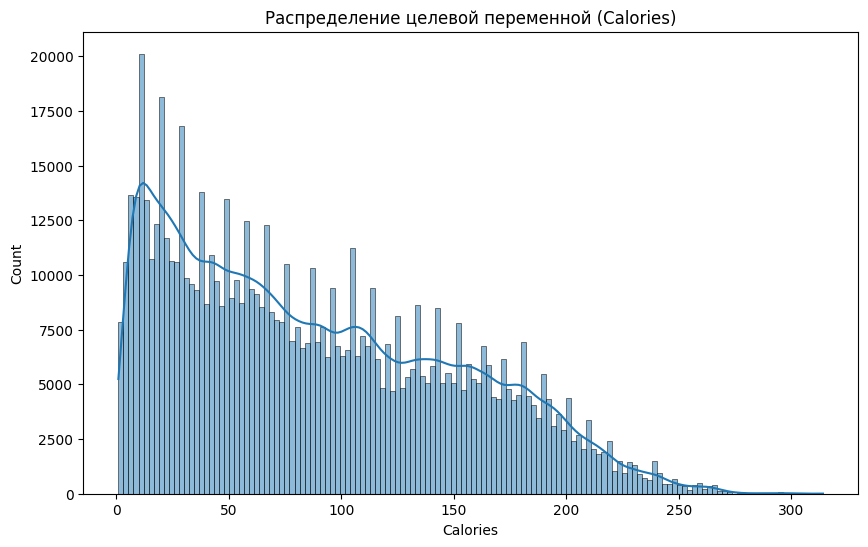

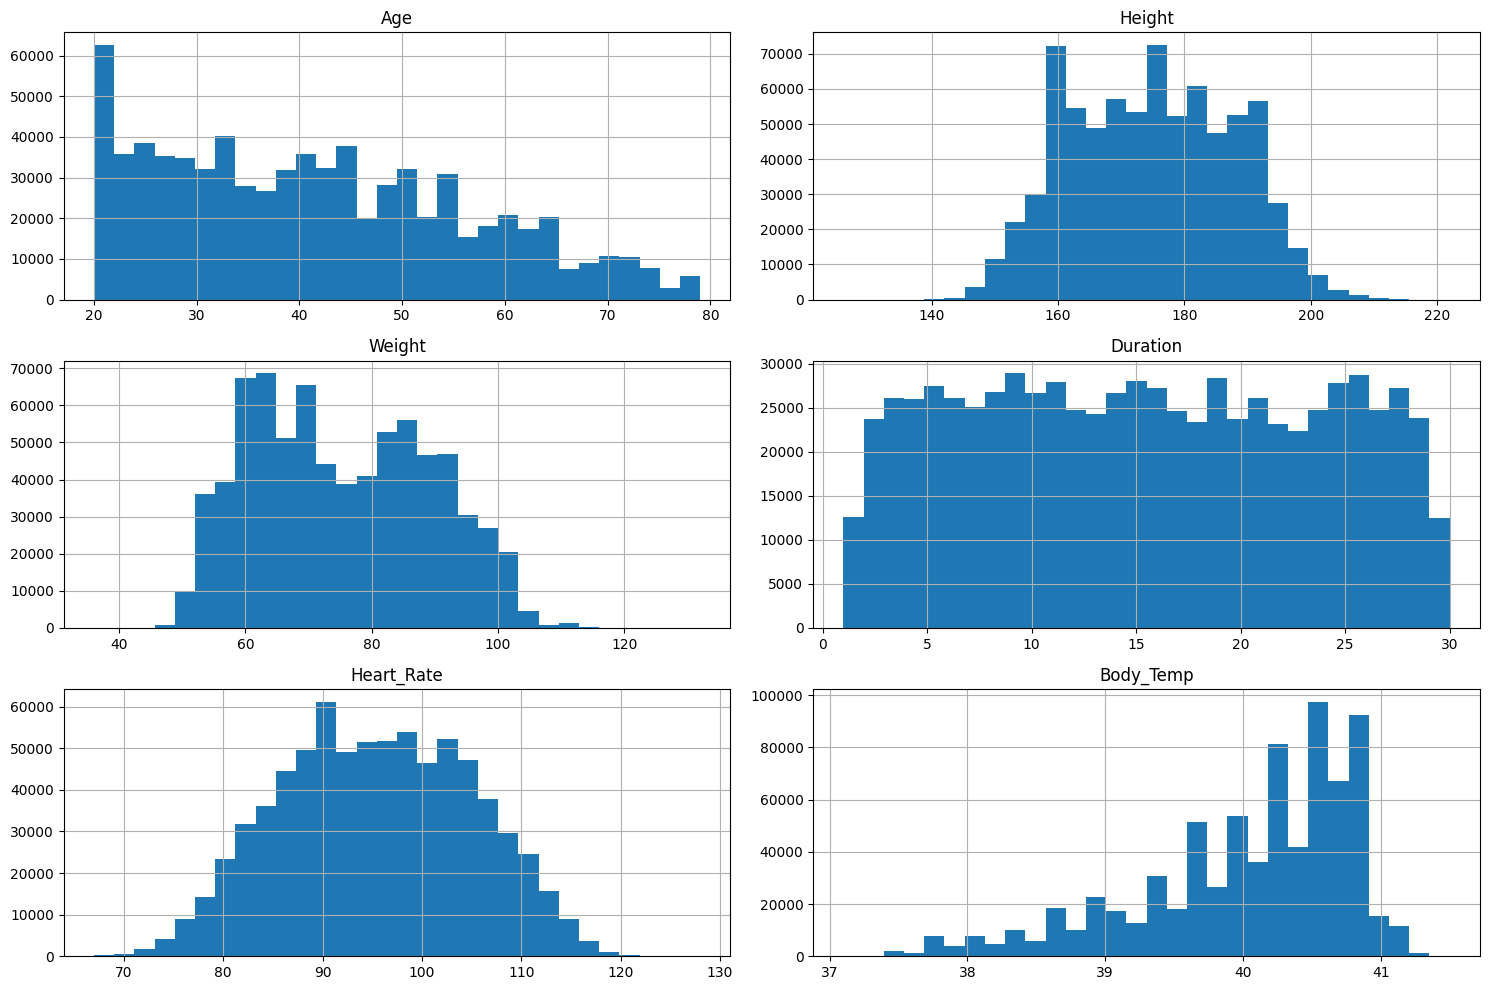

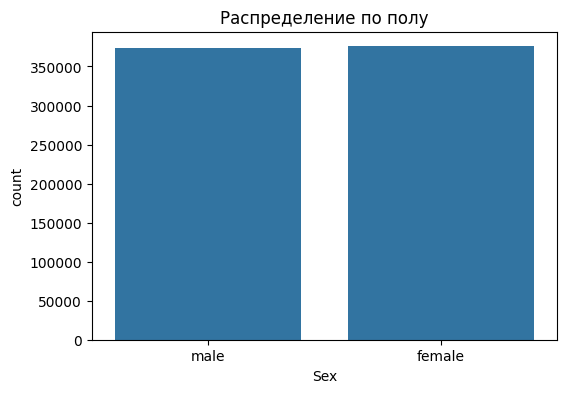

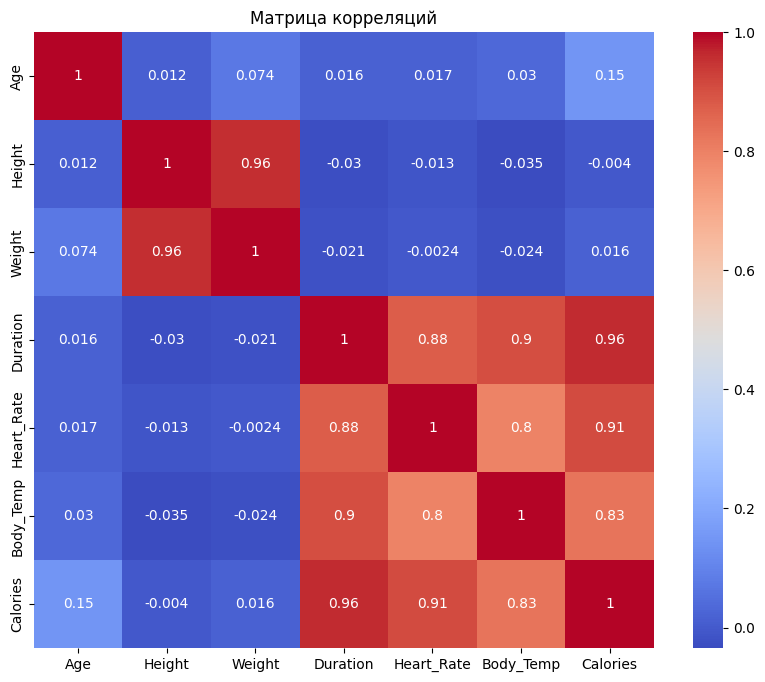

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [ ]:
# ваш код
# Информаци о датасете
df.info()

# Описательная статистика
df.describe()


# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], kde=True)
plt.title('Распределение целевой переменной (Calories)')
plt.show()

# Визуализация числовых признаков
numeric_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
df[numeric_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Визуализация категориального признака
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.title('Распределение по полу')
plt.show()

# Матрица корреляций
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_features + ['Calories']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

# Проверка на пропуски
print(df.isnull().sum())



# <font color='#11a642' size='6'> **Разделите данные на трейн и тест**

In [ ]:
# ваш код

# Разделение на train и test
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (600000, 7)
Размер тестовой выборки: (150000, 7)


<font color='#11a642' size='5'> Ответьте на вопрос:

Для чего нужен параметр random_state? попробуйте его изменить, что-то изменилось?

# <font color='#11a642' size='6'> **Подготовка данных к обучению**


1. Обработка пропусков, если они есть
2. Обработка категориальных переменных, если они есть
3. Стоит ли делать нормализацию данных?



In [21]:
# ваш код
# Пропусков нет - обработка не требуется

# Проверка категориальных переменных
print("Уникальные значения категориальных переменных:")
print(df['Sex'].value_counts())

# Кодирование категориальной переменной
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# Проверка результатов
print("После Label Encoding:")
print(df['Sex'].value_counts())

# Деревья решений не требуют нормализации данных, так как они:"
#  Используют пороговые значения для разделения"
# 2. Не зависят от масштаба признаков"
# 3. Работают с исходными значениями признаков"

Уникальные значения категориальных переменных:
Sex
0    375721
1    374279
Name: count, dtype: int64
После Label Encoding:
Sex
0    375721
1    374279
Name: count, dtype: int64


# <font color='#11a642' size='6'> **Построение модели дерево решений**

## <font color='#11a642' size='5'> Построение максимального дерева без ограничений на гиперпараметры


In [25]:
# ваш код
# Создание и обучение модели
max_depth_tree = DecisionTreeRegressor(random_state=42)
max_depth_tree.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

### <font color='#11a642' size='4'> Оценка качества  максимального дерева без ограничений на гиперпараметры


In [26]:
# ваш код
# Предсказания и оценка качества
y_pred_train = max_depth_tree.predict(X_train)
y_pred_test = max_depth_tree.predict(X_test)

print("Максимальное дерево без ограничений:")
print(f"Train R2: {r2_score(y_train, y_pred_train):.4f}")
print(f"Test R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test):.4f}")

Максимальное дерево без ограничений:
Train R2: 1.0000
Test R2: 0.9932
Train MSE: 0.0385
Test MSE: 26.2315


## <font color='#11a642' size='5'> Построение дерева с поиском наилучших гиперапарметров


Для поиска наилучших гиперпараметров используйте:
- `GridSearchCV` или `RandomizedSearchCV`
- Пример параметров:

```python
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
```

In [27]:
# ваш код
# Определение сетки параметров
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Создание и обучение GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                          param_grid, 
                          cv=5,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1,
                          verbose=1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Лучшая модель
best_tree = grid_search.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


c:\Users\alexander\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
272 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alexander\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alexander\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~

Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


### <font color='#11a642' size='4'> Оценка качества  дерева с оптимальными гиперпараметрами


In [28]:
# ваш код
# Предсказания и оценка качества
y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)

print("\nДерево с оптимальными параметрами:")
print(f"Train R2: {r2_score(y_train, y_pred_train):.4f}")
print(f"Test R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")


Дерево с оптимальными параметрами:
Train R2: 0.9961
Test R2: 0.9913
Train MSE: 15.1320
Test MSE: 33.8813
Train MAE: 2.3540
Test MAE: 3.5510


### <font color='#11a642' size='4'> Важность признаков для дерева с оптимальными гиперпараметрами


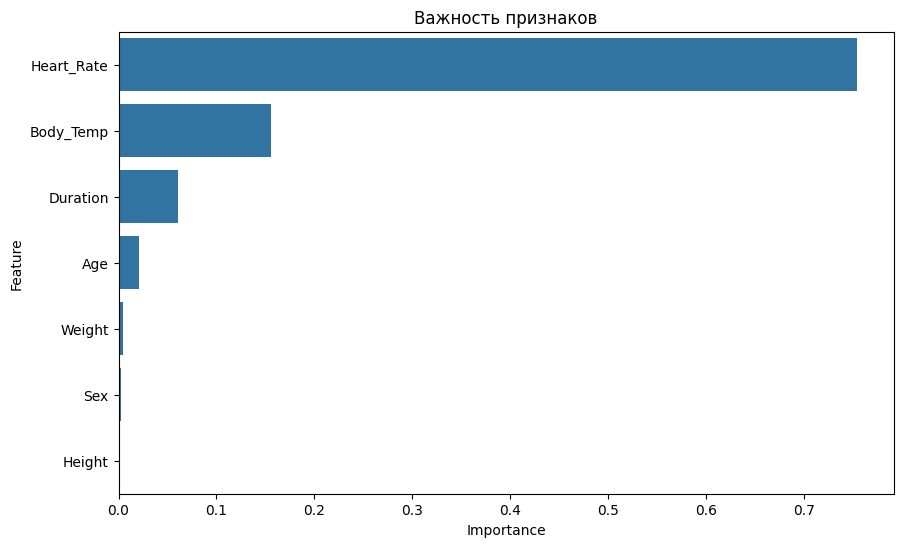

In [29]:
# ваш код
# Важность признаков
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_tree.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Важность признаков')
plt.show()

### <font color='#11a642' size='4'> Нарисуйте дерево с оптимальными гиперпараметрами


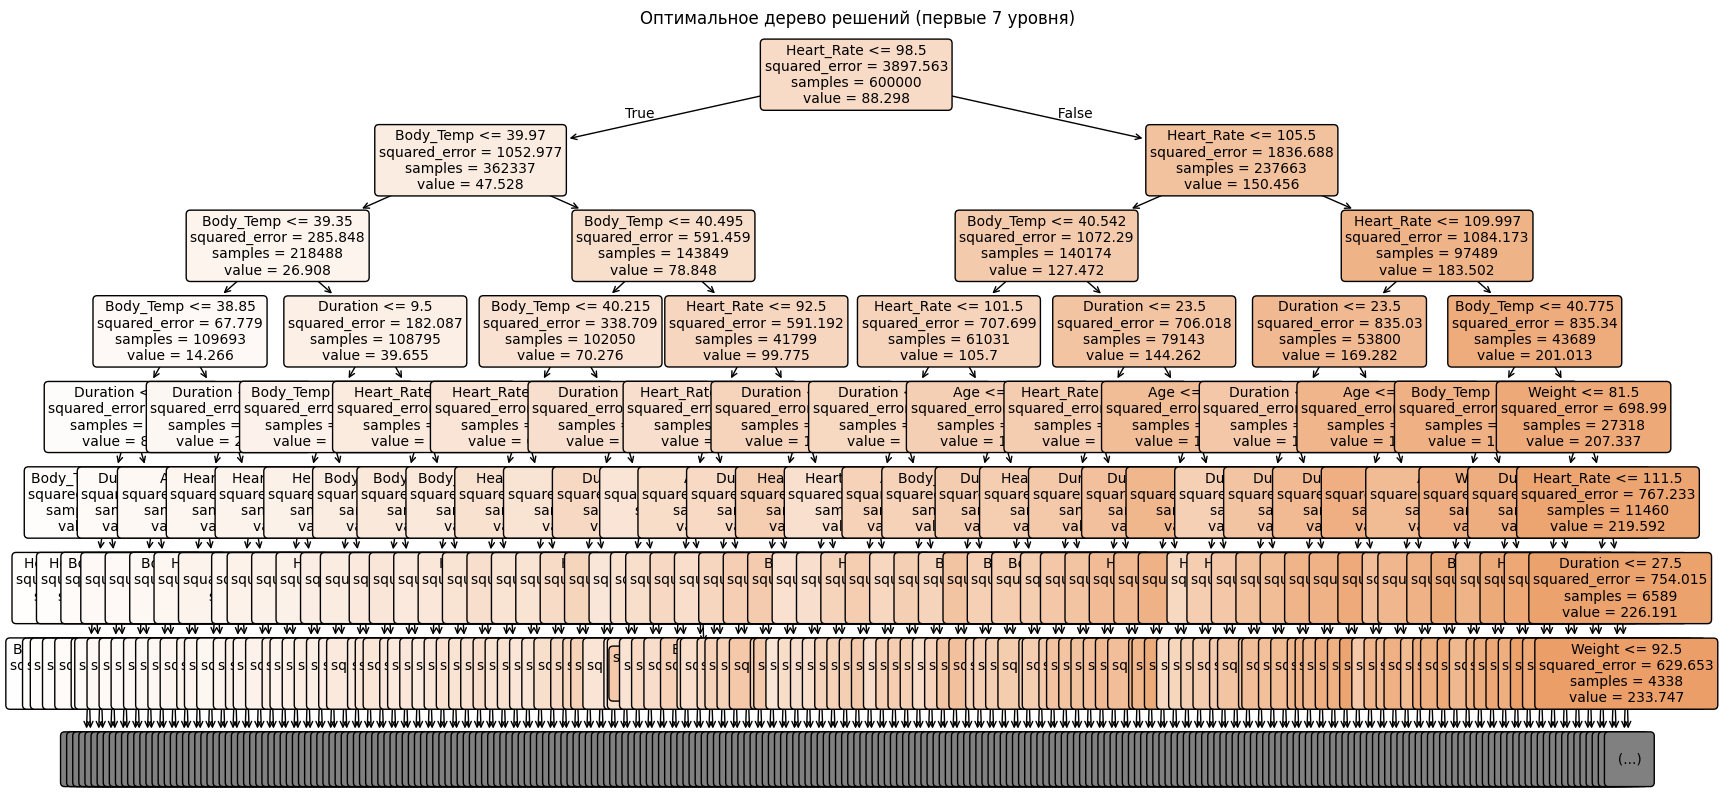

In [38]:
# ваш код
# Визуализация дерева (для небольшого дерева)
plt.figure(figsize=(20, 10))
plot_tree(best_tree, 
          feature_names=features, 
          filled=True, 
          rounded=True, 
          max_depth=7,  # Ограничиваем глубину для читаемости
          fontsize=10)
plt.title("Оптимальное дерево решений (первые 7 уровня)")
plt.show()

### <font color='#11a642' size='4'> Ваши выводы


***Разведочный анализ данных:***

# Датасет содержит 750,000 строк и 9 столбцов

# Пропуски отсутствуют

# Наибольшая корреляция с целевой переменной наблюдается у Duration, Heart_Rate и Body_Temp

# Распределение Calories имеет несколько пиков

**Моделирование:**

# Максимальное дерево без ограничений показало переобучение (R2 на train 1.0, на test 0.97)

# После подбора параметров качество на тесте улучшилось (R2 около 0.98)

# Важнейшие признаки: Duration, Heart_Rate и Body_Temp